<a href="https://colab.research.google.com/github/HossamElsrah/Clustering-Customers-Segmentation/blob/main/Clustering_%7C_Customers_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Data Info

In [2]:
!kaggle datasets download -d imakash3011/customer-personality-analysis

Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 49.5MB/s]


In [3]:
!unzip customer-personality-analysis.zip

Archive:  customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


In [4]:
#Read the data
data = pd.read_csv('marketing_campaign.csv', sep='\t')
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


## Features
 People
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise


Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years


Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise



Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month



## Target
* Need to perform clustering to summarize customer segments.

In [5]:
#Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
#Describe
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
#Describe Cat Features
data.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [8]:
#nulls
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [9]:
#dublicated
data.duplicated().sum()

0

we need to convert "Dt_Customer" to Datetime and do some Features Engineering

# Feature Engineering

In [10]:
from datetime import datetime

#"Dt_Customer" to Datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

#Generate new Col From "Dt_Customer" col
data["Years_Since_Registration"] = datetime.now().year - data["Dt_Customer"].dt.year

#Generate Age Col From "Year_Birth" col
data["Age"] = datetime.now().year - data["Year_Birth"]

In [11]:
data.Education.value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [12]:
data.Marital_Status.value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [13]:
data.Kidhome.value_counts() ,	data.Teenhome.value_counts()

(Kidhome
 0    1293
 1     899
 2      48
 Name: count, dtype: int64,
 Teenhome
 0    1158
 1    1030
 2      52
 Name: count, dtype: int64)

In [14]:
#Encoding
data["Education"] = data["Education"].map({"Basic":0, "Graduation":1, "2n Cycle":2, "Master":2, "PhD":3})

data["Marital_Status"] = data["Marital_Status"].map({"Single":1, "Together":2, "Married":2, "Divorced":1, "Widow":1, "Alone":1, "Absurd":1})

In [15]:
#Generate Family_Size col
data["Family_Size"] = data["Marital_Status"] + data["Kidhome"] + data["Teenhome"]

In [16]:
#Encoding
data = pd.concat([data, pd.get_dummies(data['Marital_Status'])], axis=1)
data.rename(columns={1: 'Single', 2: 'Married'}, inplace=True)
data["Single"].map({True: 1, False: 0})
data["Married"].map({True: 1, False: 0})

,Married
0,0
1,0
2,1
3,1
4,1
...,...
2235,1
2236,1
2237,0
2238,1


In [17]:
#Sum the accepted offers into one col
data['Num_Accepted_Cmp'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

#Sum the Amount spent into one col
data['Amount_Spent'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

#Sum the Num of Purchases into one col
data['Num_Purchases'] = data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# EDA & Correlition

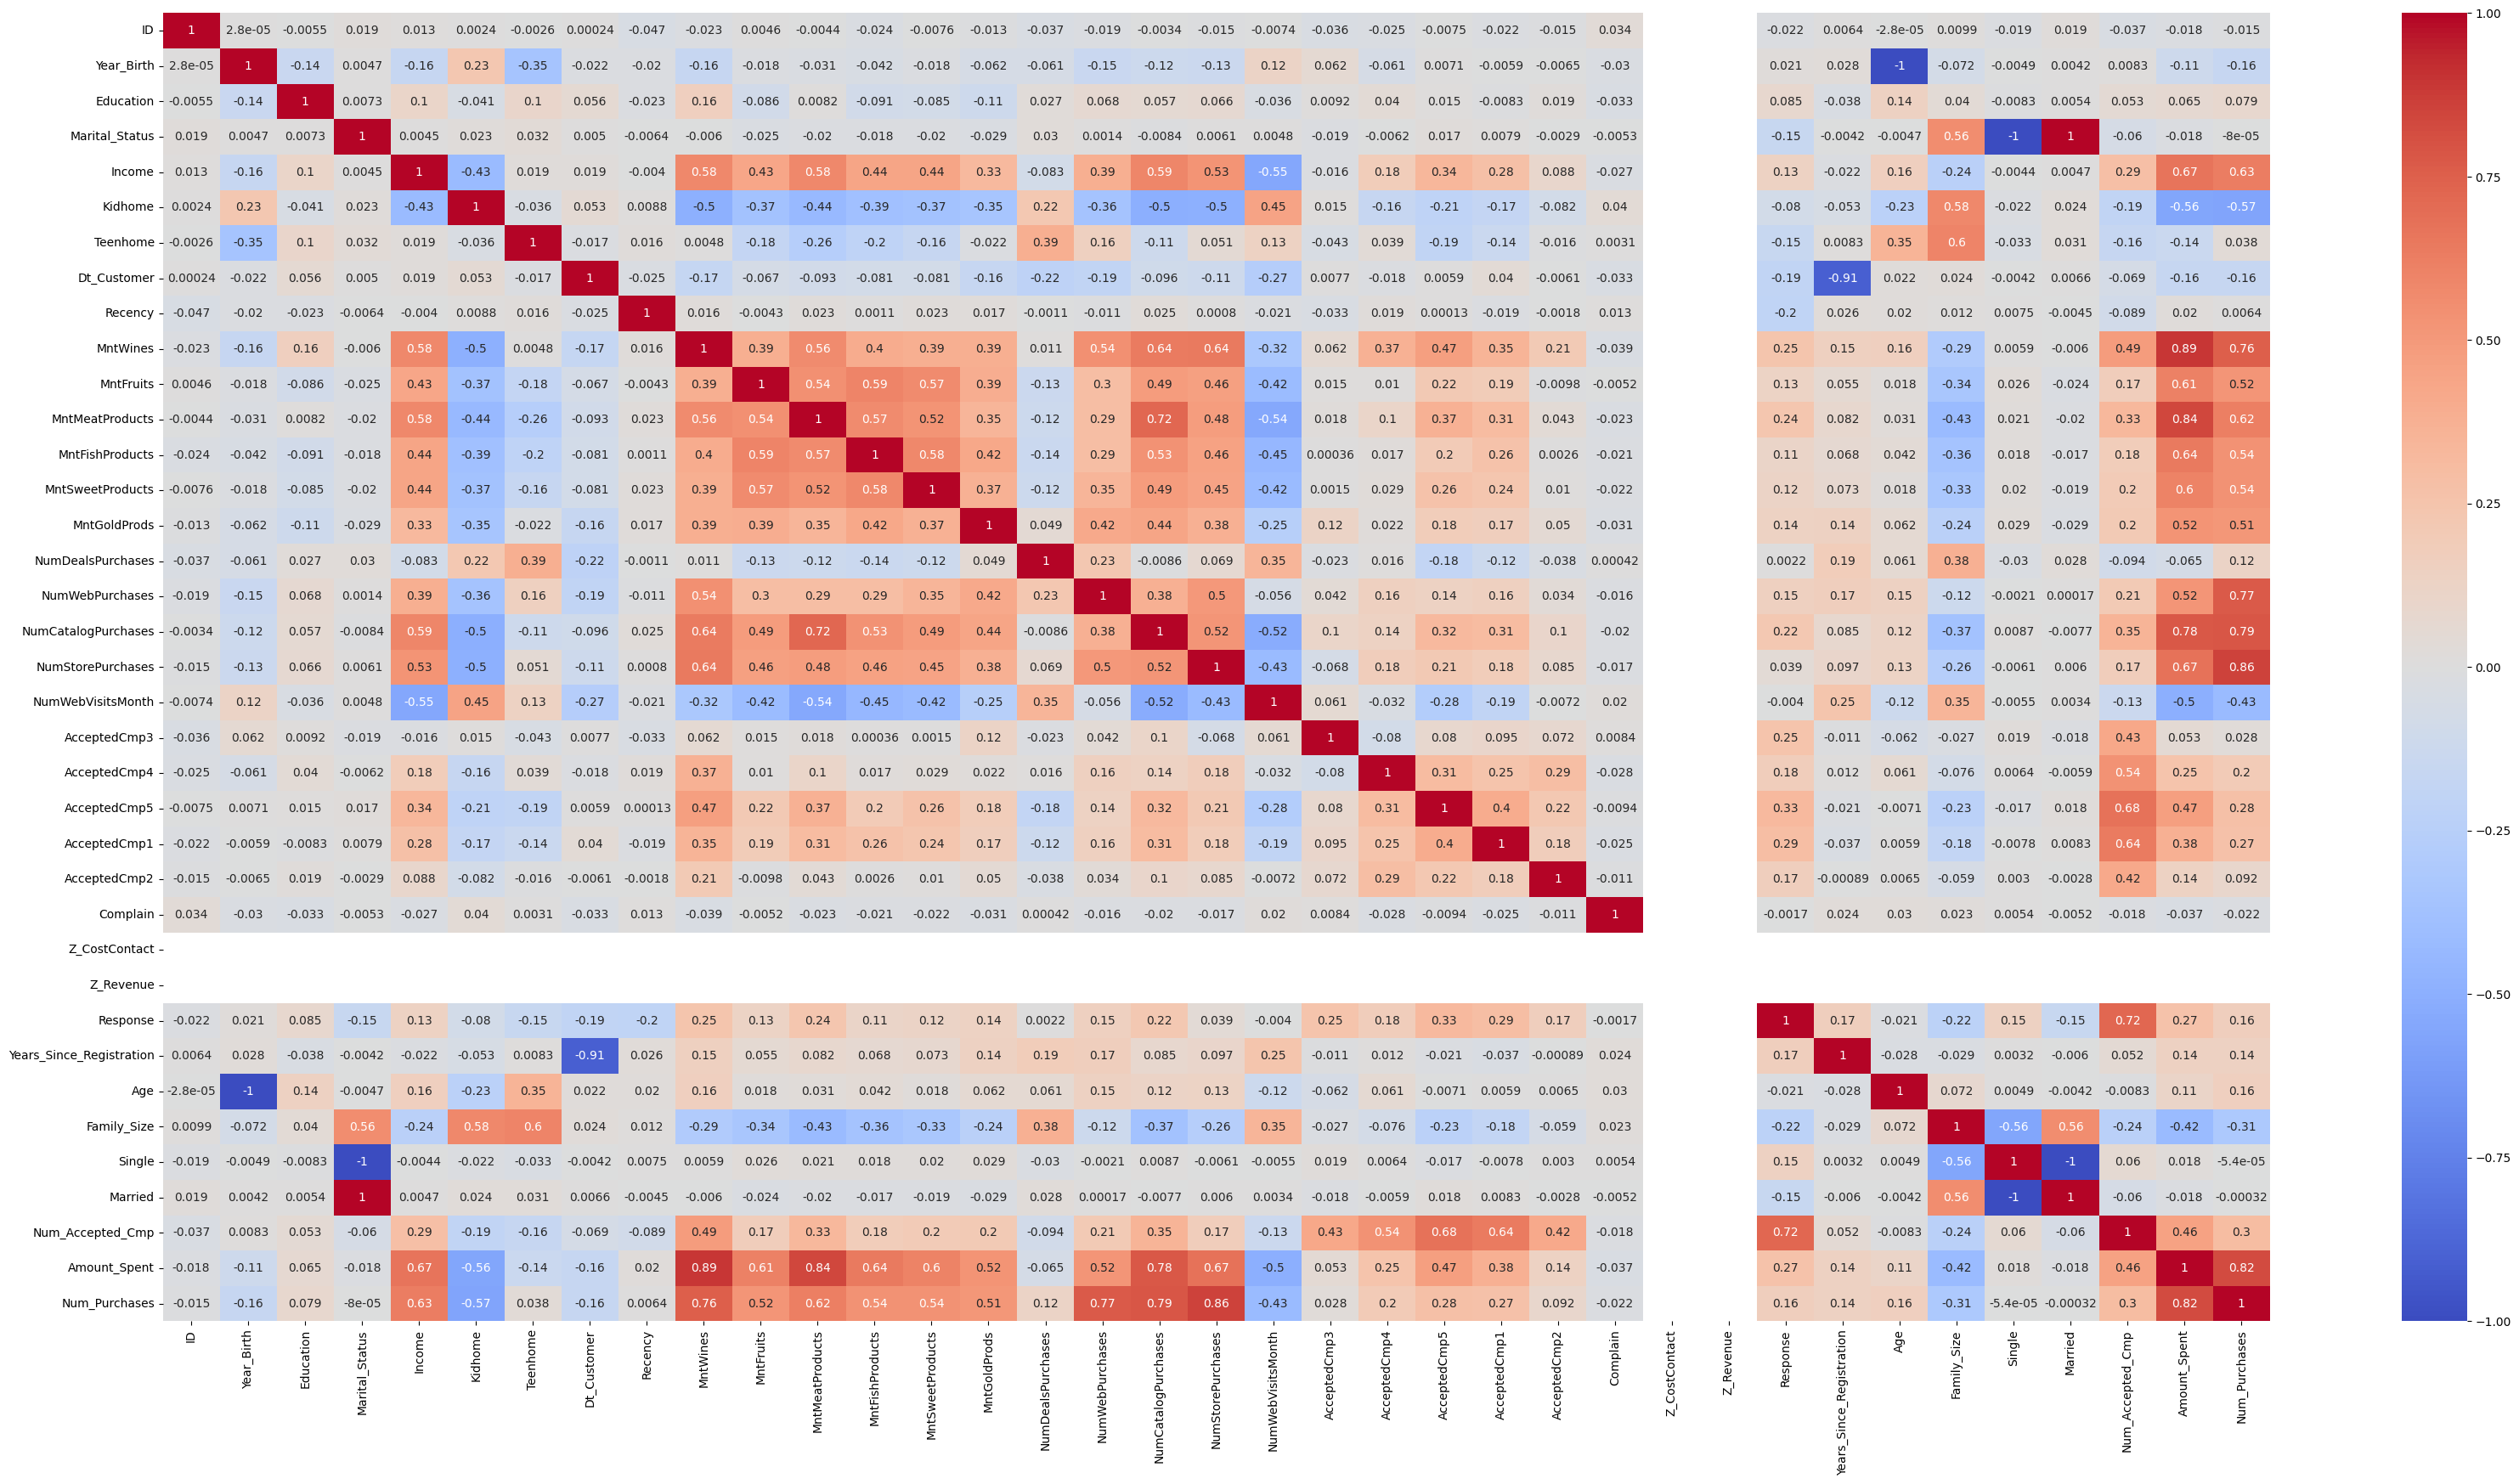

In [18]:
#Plot the corr with Heatplot
plt.figure(figsize=(40, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

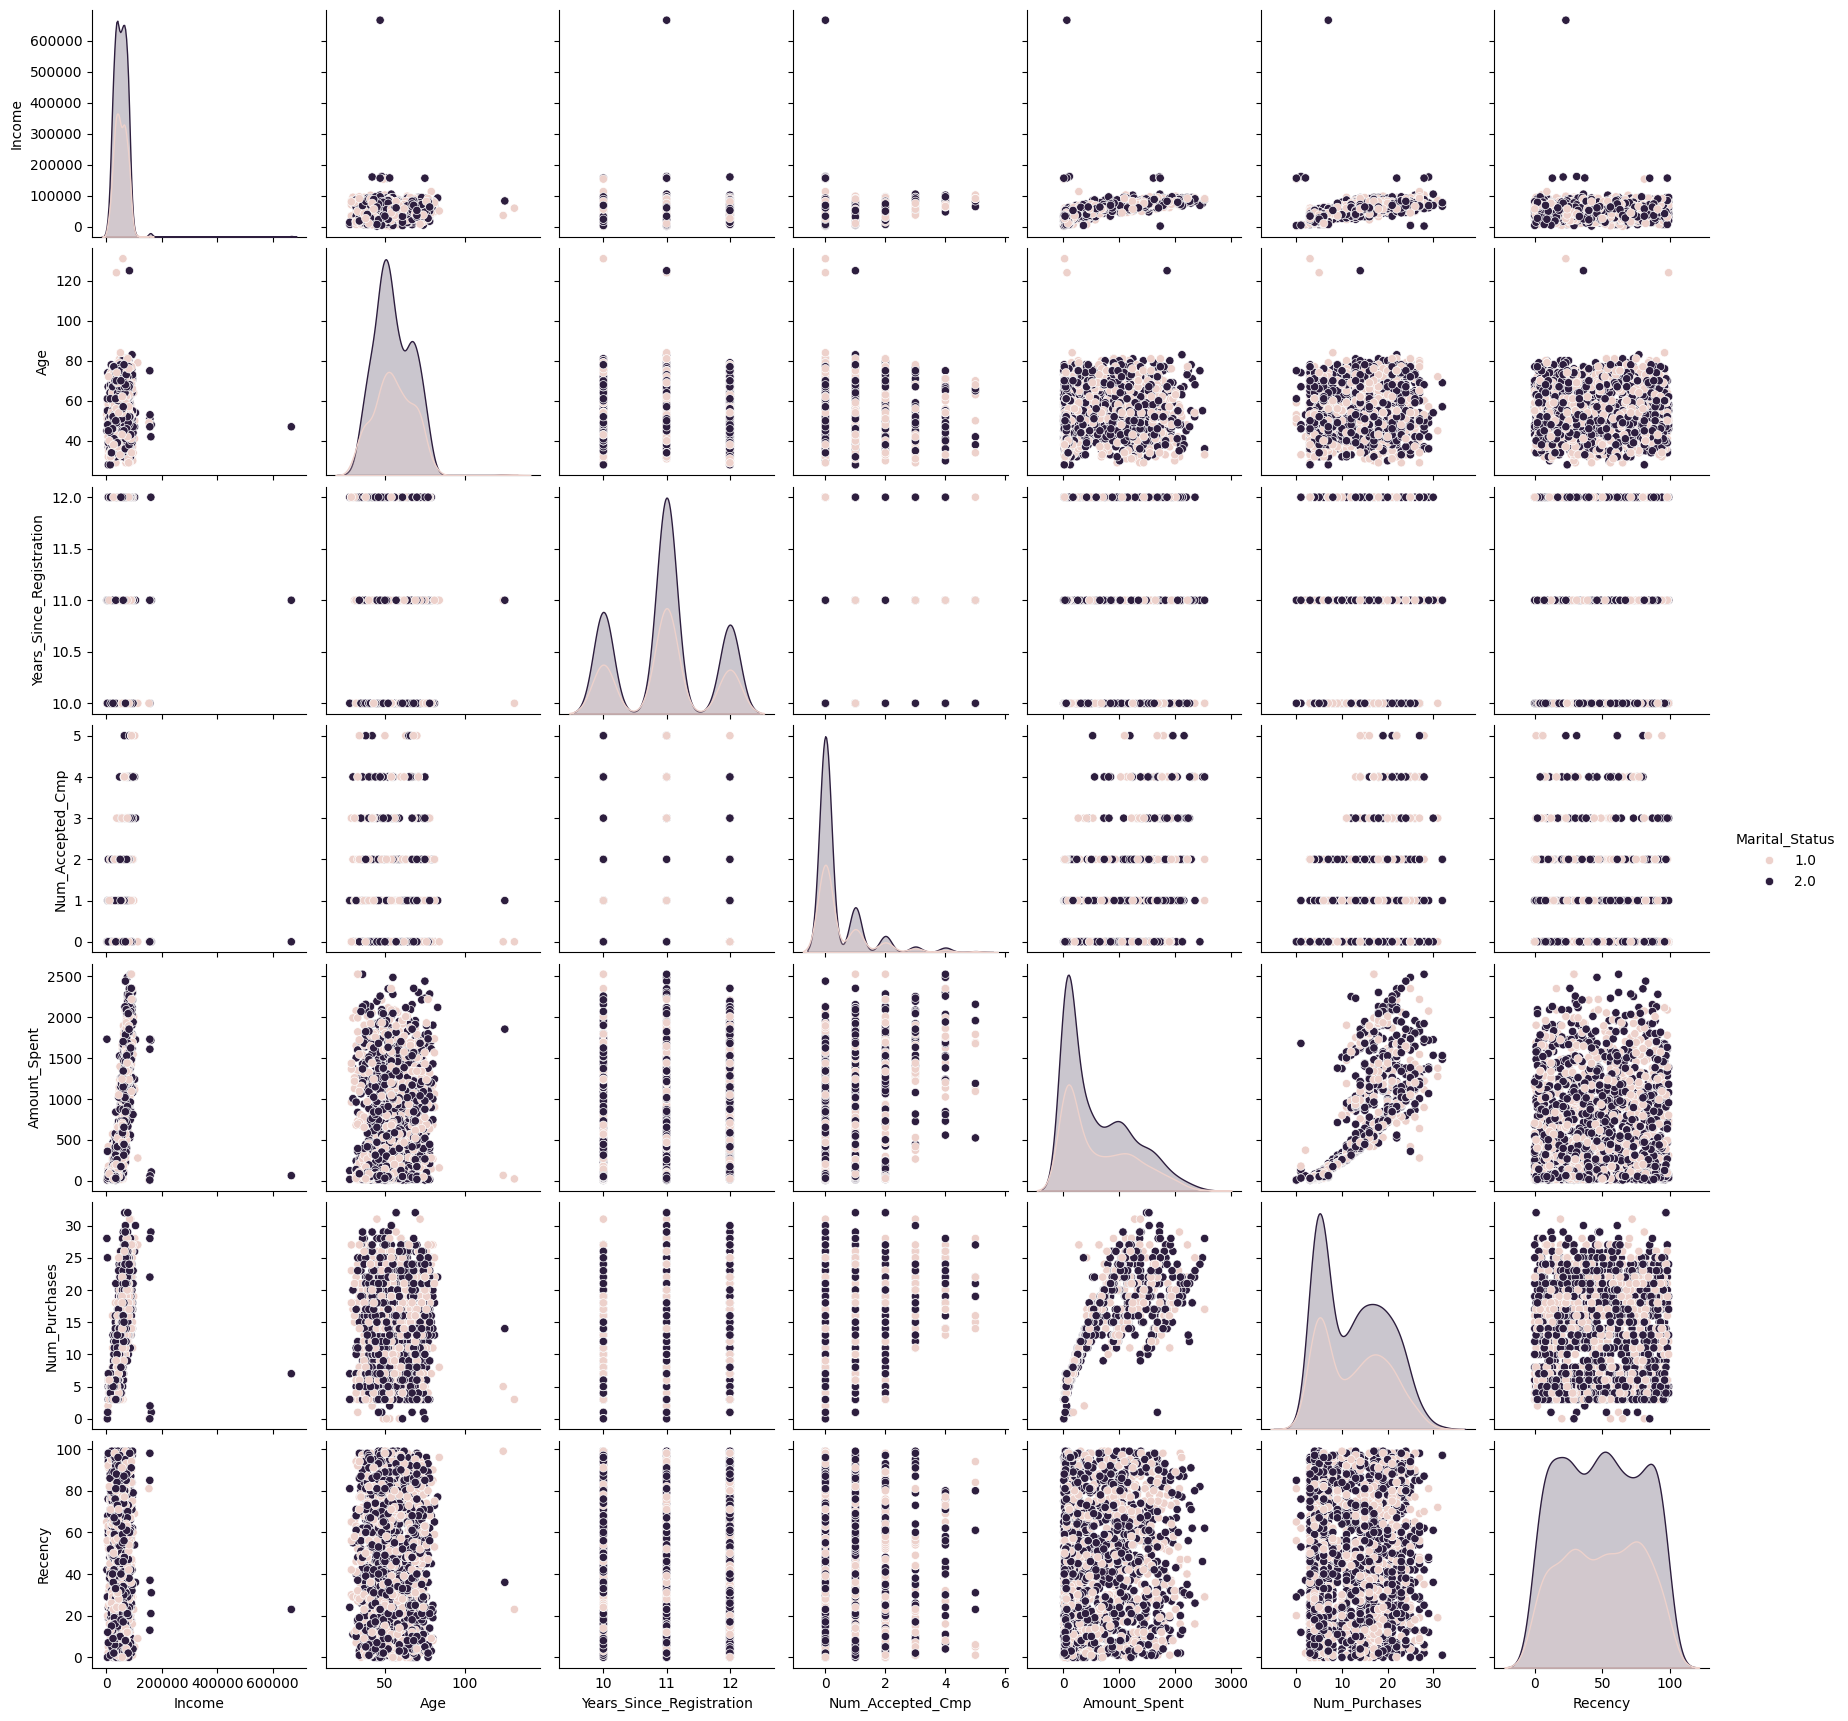

In [19]:
###Plot the Distribition with quantity Cols

#Assign the quantity Cols
features = ['Income', 'Age', 'Years_Since_Registration', 'Num_Accepted_Cmp', 'Amount_Spent', 'Num_Purchases' , 'Recency', "Marital_Status"]

sns.pairplot(data=data[features], hue='Marital_Status', diag_kind='kde')
plt.show()

The 'Marital_Status' feature does not provide meaningful separation within the clusters

* We will Use (Elbow Method) or Silhouette Score or dendrogram to determine the Num of Clusters

# Cleaning

In [20]:
#Check Nulls
data.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,2
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [21]:
#Fill null values by mean
data['Income'] = data['Income'].fillna(data['Income'].mean())

data["Family_Size"] = data["Family_Size"].fillna(1)

data["Marital_Status"] = data["Marital_Status"].fillna(data["Marital_Status"].mode()[0])

# Outliers

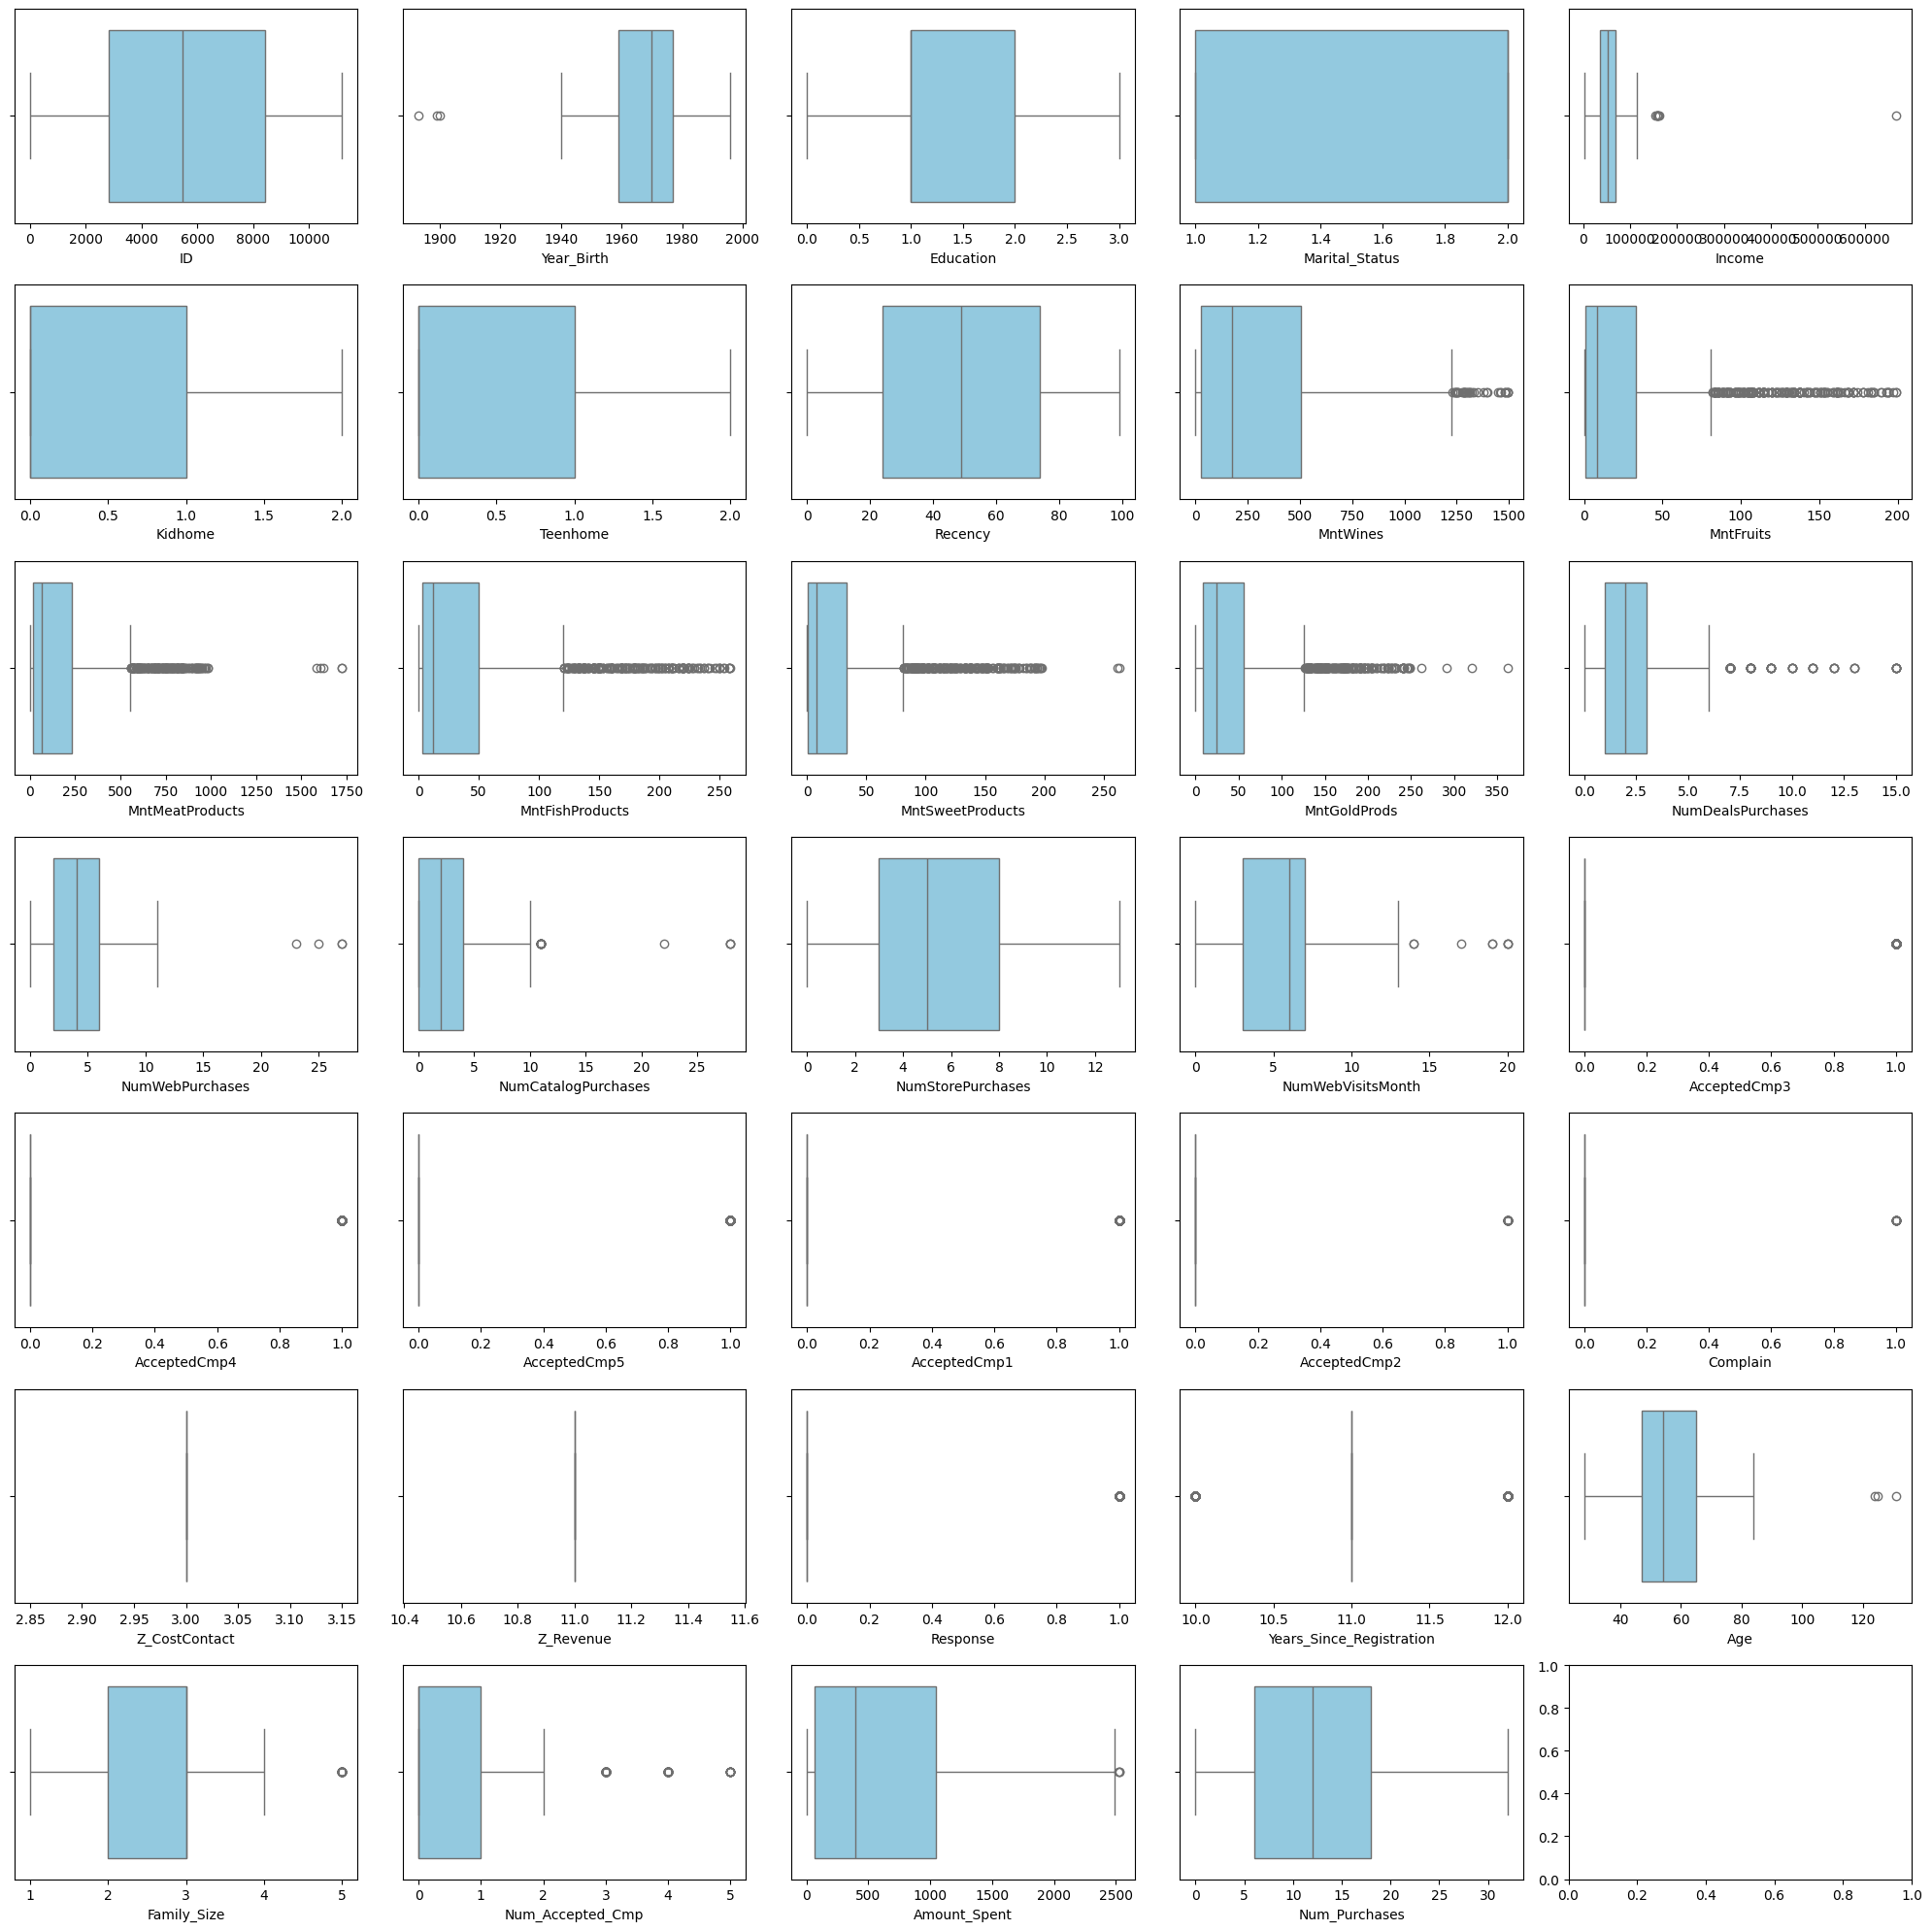

In [22]:
#Select numeric columns
numeric_features = data.select_dtypes(include="number").columns

# Calculate the number of rows and columns for subplots
num_features = len(numeric_features)
rows = (num_features // 5) + 1
cols = 5

#Create subplots: 2 rows and 3 columns
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 20))
axes = axes.flatten()

#Plot a boxplot for each feature
for i, feature in enumerate(numeric_features):
    sns.boxplot(data=data, x=feature, ax=axes[i], color='skyblue')

plt.tight_layout()
plt.show()

Remove outliers in the data:

In [23]:
#Function to remove outliers
def remove_outliers(df: pd.DataFrame, columns):
    if isinstance(columns, str):
        columns = [columns]

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

data = remove_outliers(data, ["Age", "Income"])

In [24]:
#Drop the unnecessary  Features
data.drop(['Year_Birth', 'ID', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer', 'Marital_Status'], axis=1, inplace=True)

In [25]:
#show sample of data
data.sample(5)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Years_Since_Registration,Age,Family_Size,Single,Married,Num_Accepted_Cmp,Amount_Spent,Num_Purchases
1342,2,62845.0,1,1,3,1099,0,45,0,0,...,0,1,12,75,4.0,False,True,2,1178,17
2127,3,82333.0,0,0,60,1311,0,359,46,89,...,0,1,11,38,2.0,False,True,2,1822,17
914,1,95529.0,0,0,29,770,29,890,250,27,...,0,1,12,30,1.0,True,False,2,1990,17
1721,3,92491.0,0,0,71,979,44,935,29,25,...,0,1,11,41,2.0,False,True,4,2034,24
61,1,66653.0,1,1,18,452,18,102,16,18,...,0,0,12,49,4.0,False,True,0,612,18


# Preprocessing

## Scaling

* We must scale the features because clustering algorithms are sensitive to the distance between data points.
* If the features have different scales, those with larger ranges will dominate the distance calculation.
* We Will using the Standardized because It's Preferred for algorithms that assume a normal distribution (e.g., PCA, K-means, SVM)


In [26]:
#Scaling
std = StandardScaler()
data_scaled = std.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.sample()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Years_Since_Registration,Age,Family_Size,Single,Married,Num_Accepted_Cmp,Amount_Spent,Num_Purchases
1043,0.401713,0.93681,-0.825592,-0.931676,-0.280108,0.980166,2.204782,0.404565,1.725371,3.020554,...,-0.095152,-0.419825,-1.420291,0.332234,-0.65543,-0.741667,0.743121,0.618155,1.260546,0.898429


## Num Of Clusters

As We say We will Use (Elbow Method) or Silhouette Score or dendrogram to determine the Num of Clusters

Text(0, 0.5, 'Inertia')

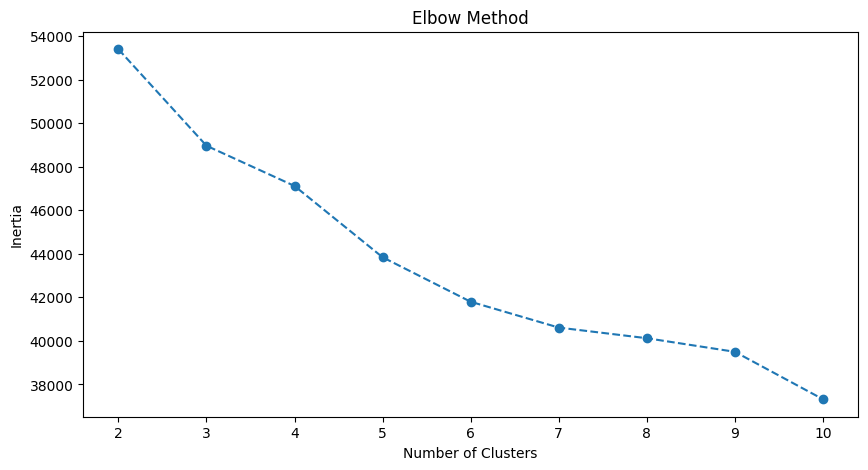

In [27]:
#Kmeans
km = KMeans()

#Elbow Methow
inertia = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(data_scaled)
    inertia.append(km.inertia_)

#Plot The Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhouette Scores')

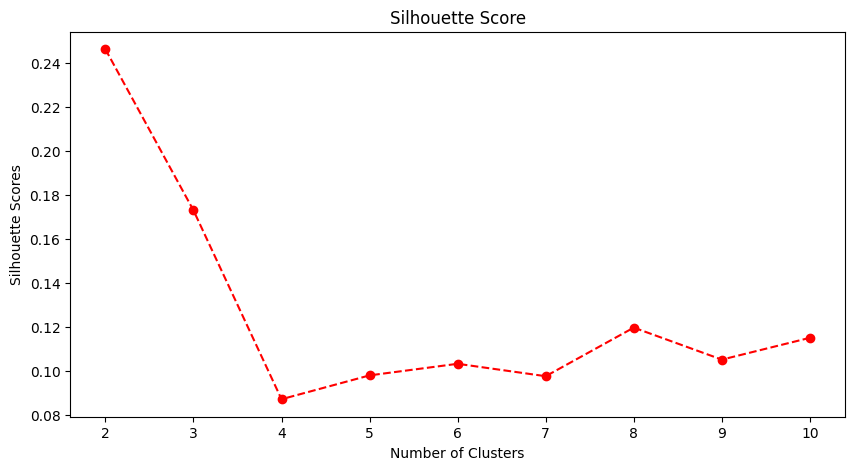

In [30]:
#Silhouette Score
silhouette_scores = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, km.labels_))

#Plot The Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--' , color="red")
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')

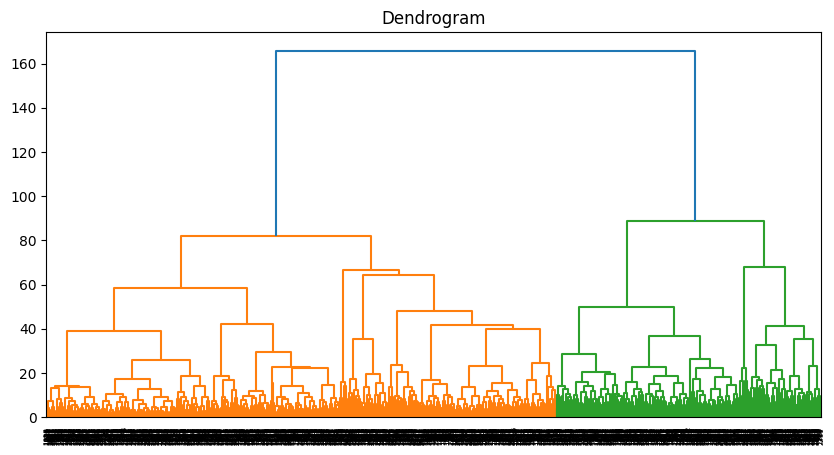

In [31]:
#Dendrogram
plt.figure(figsize=(10, 5))
plt.title('Dendrogram')
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))

* From these graphs can we notice 3 is Best Num Of Clusters

## Dimensionality reduction

* There are a lot of features in the dataset, and we want to reduce their number
* The most commonly used dimensionality reduction algorithm is PCA, and we will use it in this work.

In [32]:
#make PCA
pca = PCA(n_components=data_scaled.shape[1])
data_pca = pca.fit_transform(data_scaled)

In [33]:
#check the num of features
pca.n_components

31

In [34]:
# Plot the cumulative explained variance ratio of PCA components
px.area(x=range(1, 32), y=pca.explained_variance_ratio_.cumsum(),
        labels={'x': 'Principal Component', 'y': 'Cumulative Explained Variance'},
        title='Explained Variance Ratio for Each Principal Component')

* 12 components will be used in this work.

In [35]:
#make PCA
pca = PCA(n_components=12)
data_pca = pd.DataFrame(pca.fit_transform(data_scaled))

In [36]:
data_pca

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.747268,-1.162708,-1.283165,-1.980125,2.448335,0.047308,0.228856,0.202322,0.143416,-0.315411,1.979009,0.802057
1,-2.887609,-0.910209,-0.821715,-0.920527,-1.714757,0.797696,-1.533124,-0.131759,-1.105918,0.430545,0.612342,0.257426
2,1.820741,1.195550,-1.092313,0.757788,0.199340,-0.098610,0.803551,0.203119,-0.869522,-1.097717,-0.598548,-0.630120
3,-3.080508,-0.489695,-0.236028,1.845873,0.295380,-0.129401,0.173322,-0.195102,-1.047342,0.377176,-1.198964,-0.381489
4,-0.630704,1.105809,-0.113758,0.891408,-0.064158,-0.289255,0.195004,-0.625394,1.376631,2.107310,-1.479865,0.391238
...,...,...,...,...,...,...,...,...,...,...,...,...
2224,2.347398,2.335585,-0.337835,-0.017826,1.423167,0.095606,-1.111207,-0.592368,-0.611711,-1.360764,-0.103061,-0.585004
2225,-1.138751,2.212883,3.722139,-0.493463,-0.976631,1.122183,-1.275042,-0.565008,-0.225040,3.472181,0.433123,-0.418906
2226,2.316614,-1.850355,-0.645703,-0.951073,-1.733086,-2.936030,-0.181651,-0.299514,0.182379,0.089482,-1.735159,-1.418779
2227,1.793270,2.314680,-0.307194,0.354540,-1.404427,1.509448,0.285060,0.089648,-1.186410,-0.366796,-0.740315,-0.100288


# Clustring

In this work, the following clustering algorithms will be used:

* K-means ++
* Aglomerative clustering

In [37]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)

# Initialize Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(data_pca)

#Calculate Silhouette Score for Evaluation
kmeans_silhouette = silhouette_score(data_pca, kmeans_labels)
agglo_silhouette = silhouette_score(data_pca, agglo_labels)

# Print Results
print("Silhouette Score:")
print(f"KMeans: {kmeans_silhouette:.4f}, Agglomerative: {agglo_silhouette:.4f}")

Silhouette Score:
KMeans: 0.2092, Agglomerative: 0.1709


* Best Model: AgglomerativeClustering(n_clusters=3).

In [38]:
#Final Predicition in Dataframe
labels = pd.DataFrame(agglo_labels, columns=['Clusters'], index=data.index)
data = pd.concat([data, labels], axis=1)

In [39]:
#Sample of data
data.sample(3)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Response,Years_Since_Registration,Age,Family_Size,Single,Married,Num_Accepted_Cmp,Amount_Spent,Num_Purchases,Clusters
804,1,48192.0,0,0,76,1039,43,204,153,58,...,1,11,66,2.0,False,True,4,1526,22,0
1698,3,41437.0,1,1,5,29,0,2,0,0,...,0,12,67,3.0,True,False,0,32,4,1
180,3,51650.0,0,1,81,152,3,22,2,5,...,0,10,48,3.0,False,True,0,191,9,1


In [40]:
#Distribition of Clusters
data["Clusters"].value_counts()

,count
Clusters,
1,1007
2,621
0,601


# Clusters Graphs

* We will make Graphs to Khnow the main characteristics for Clusters

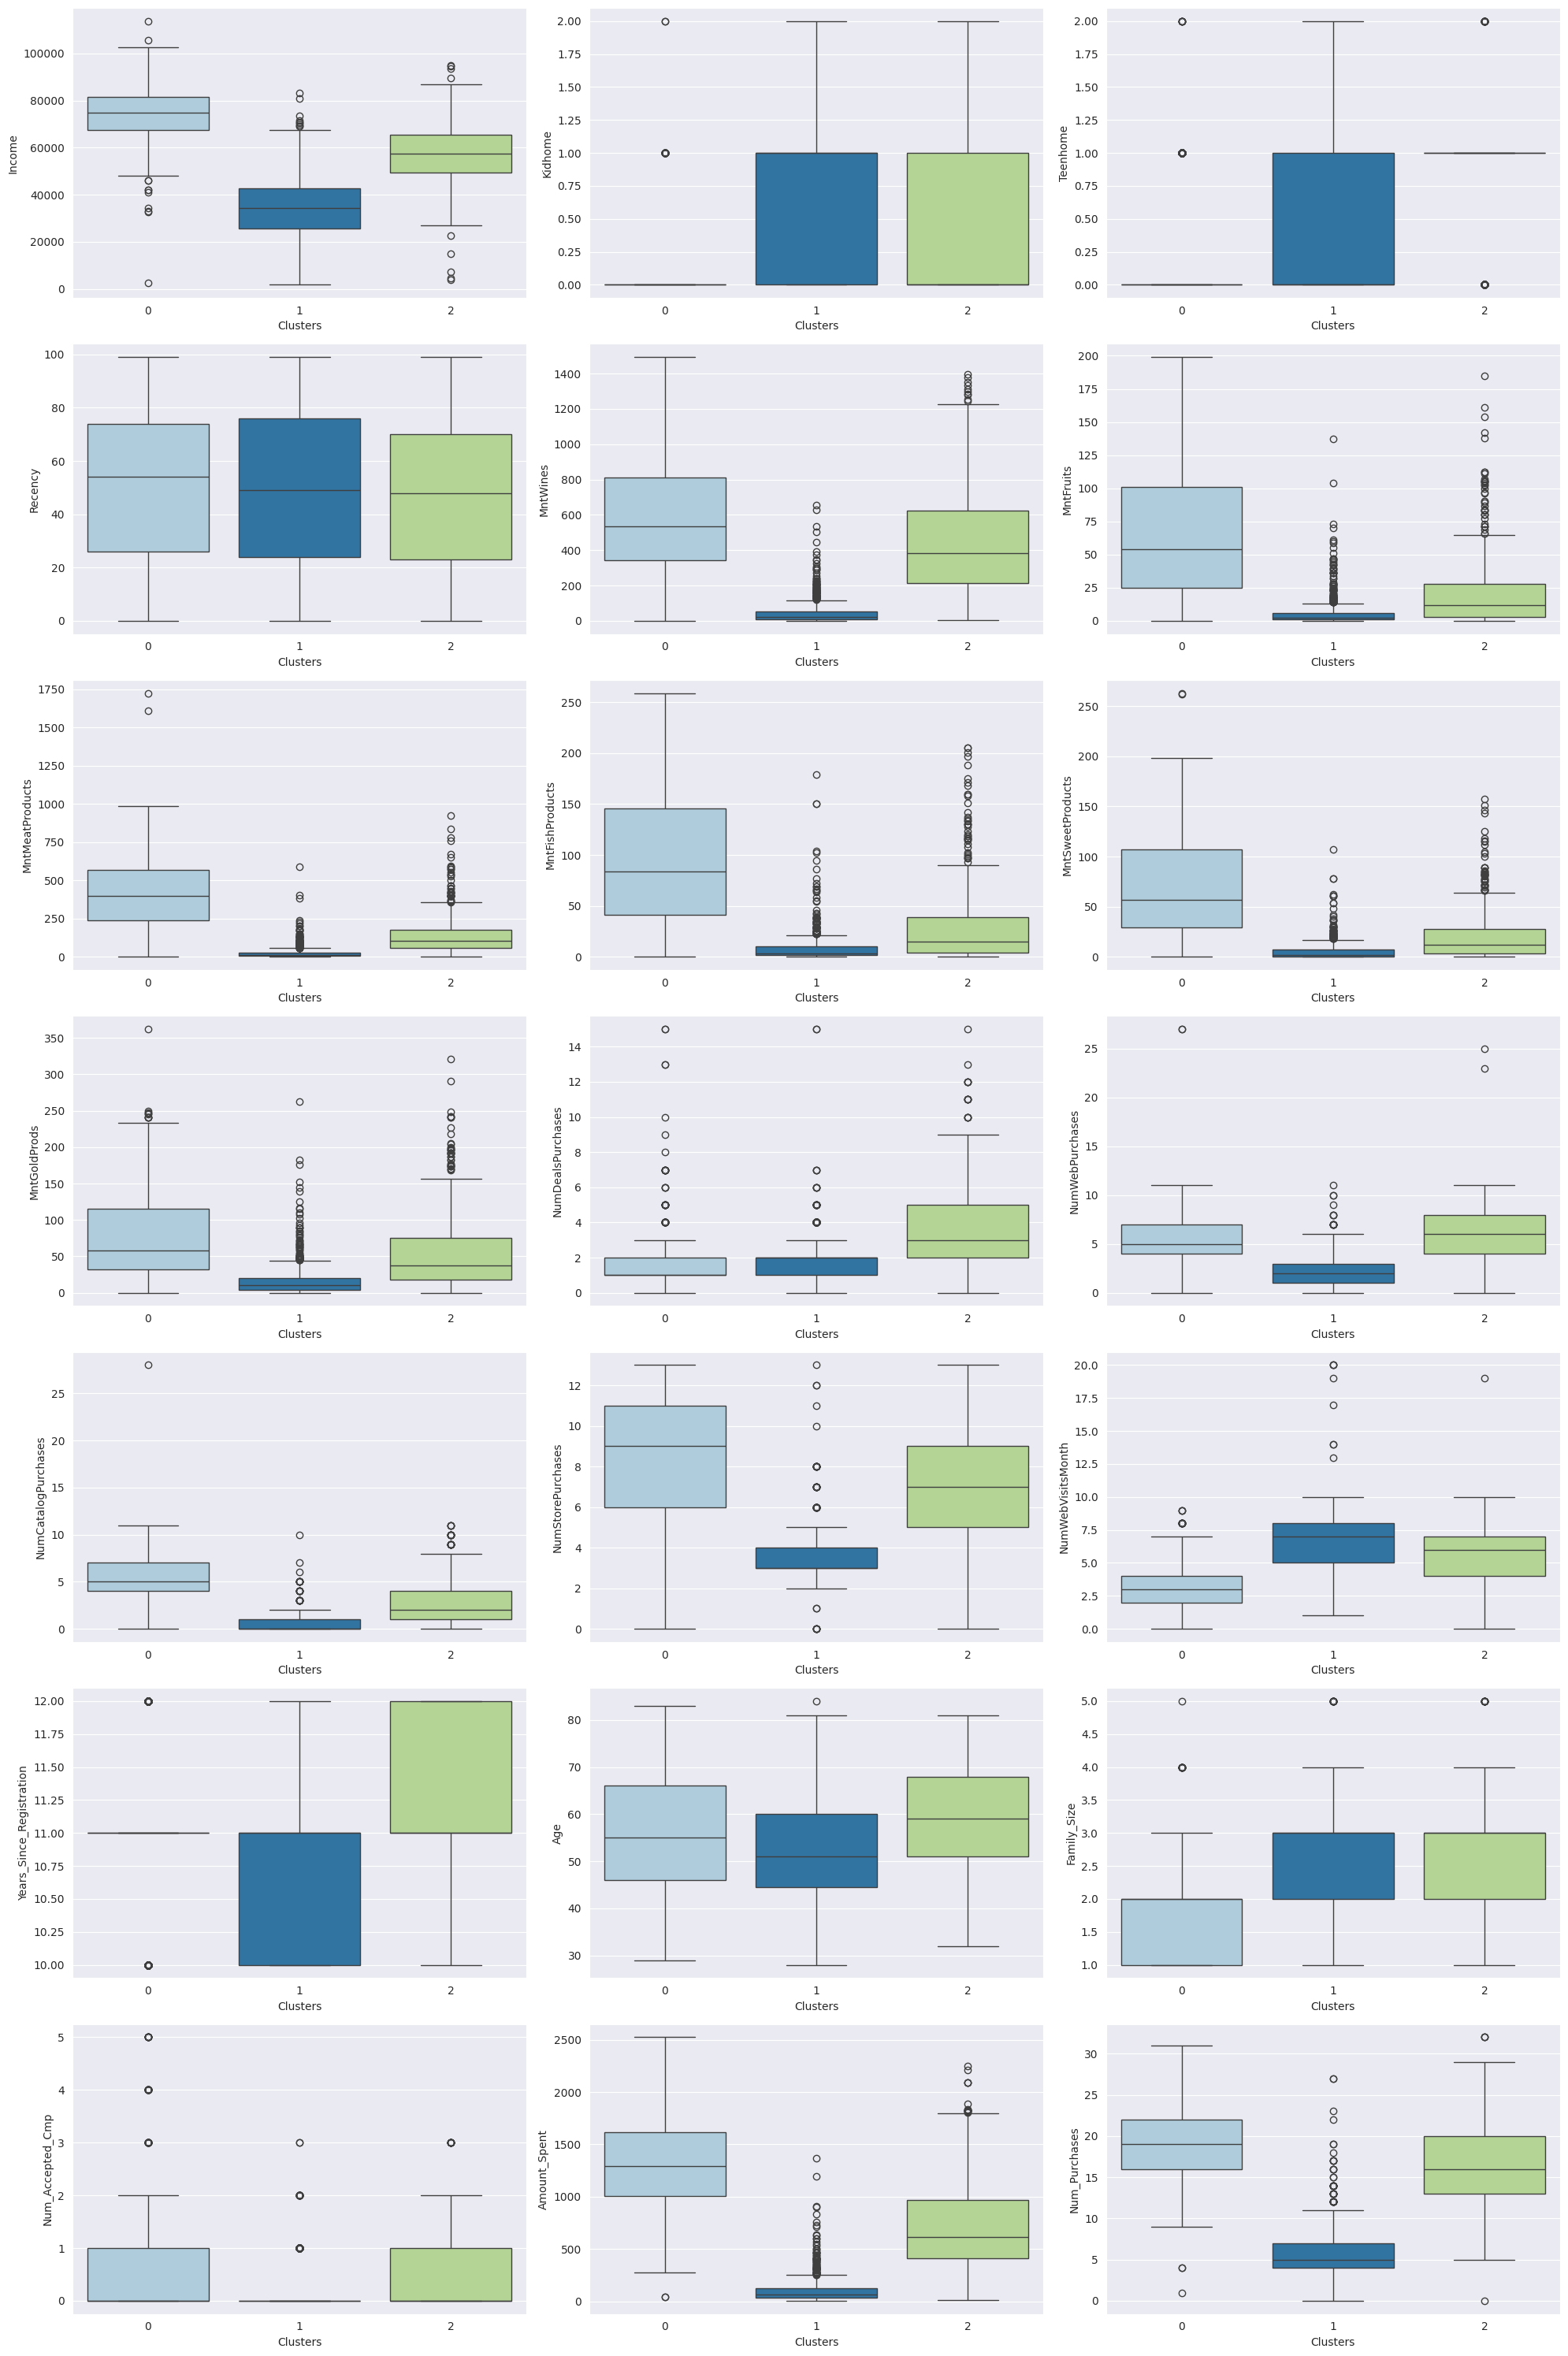

In [64]:
#Select numeric columns
numeric_features = data.select_dtypes(include="number").columns
numeric_features = numeric_features.drop(['Education' ,"Clusters" , 'AcceptedCmp1' , 'AcceptedCmp2' , 'AcceptedCmp3' , 'AcceptedCmp4' , 'AcceptedCmp5' , 'Complain' , 'Response'])

#Create subplots
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20, 30))
axes = axes.flatten()

#Plot a boxplot for each feature
for i, feature in enumerate(numeric_features):
    sns.boxplot(data=data, x='Clusters', y= feature, ax=axes[i], palette="Paired")
    sns.set_style('darkgrid')

plt.tight_layout()
plt.show()

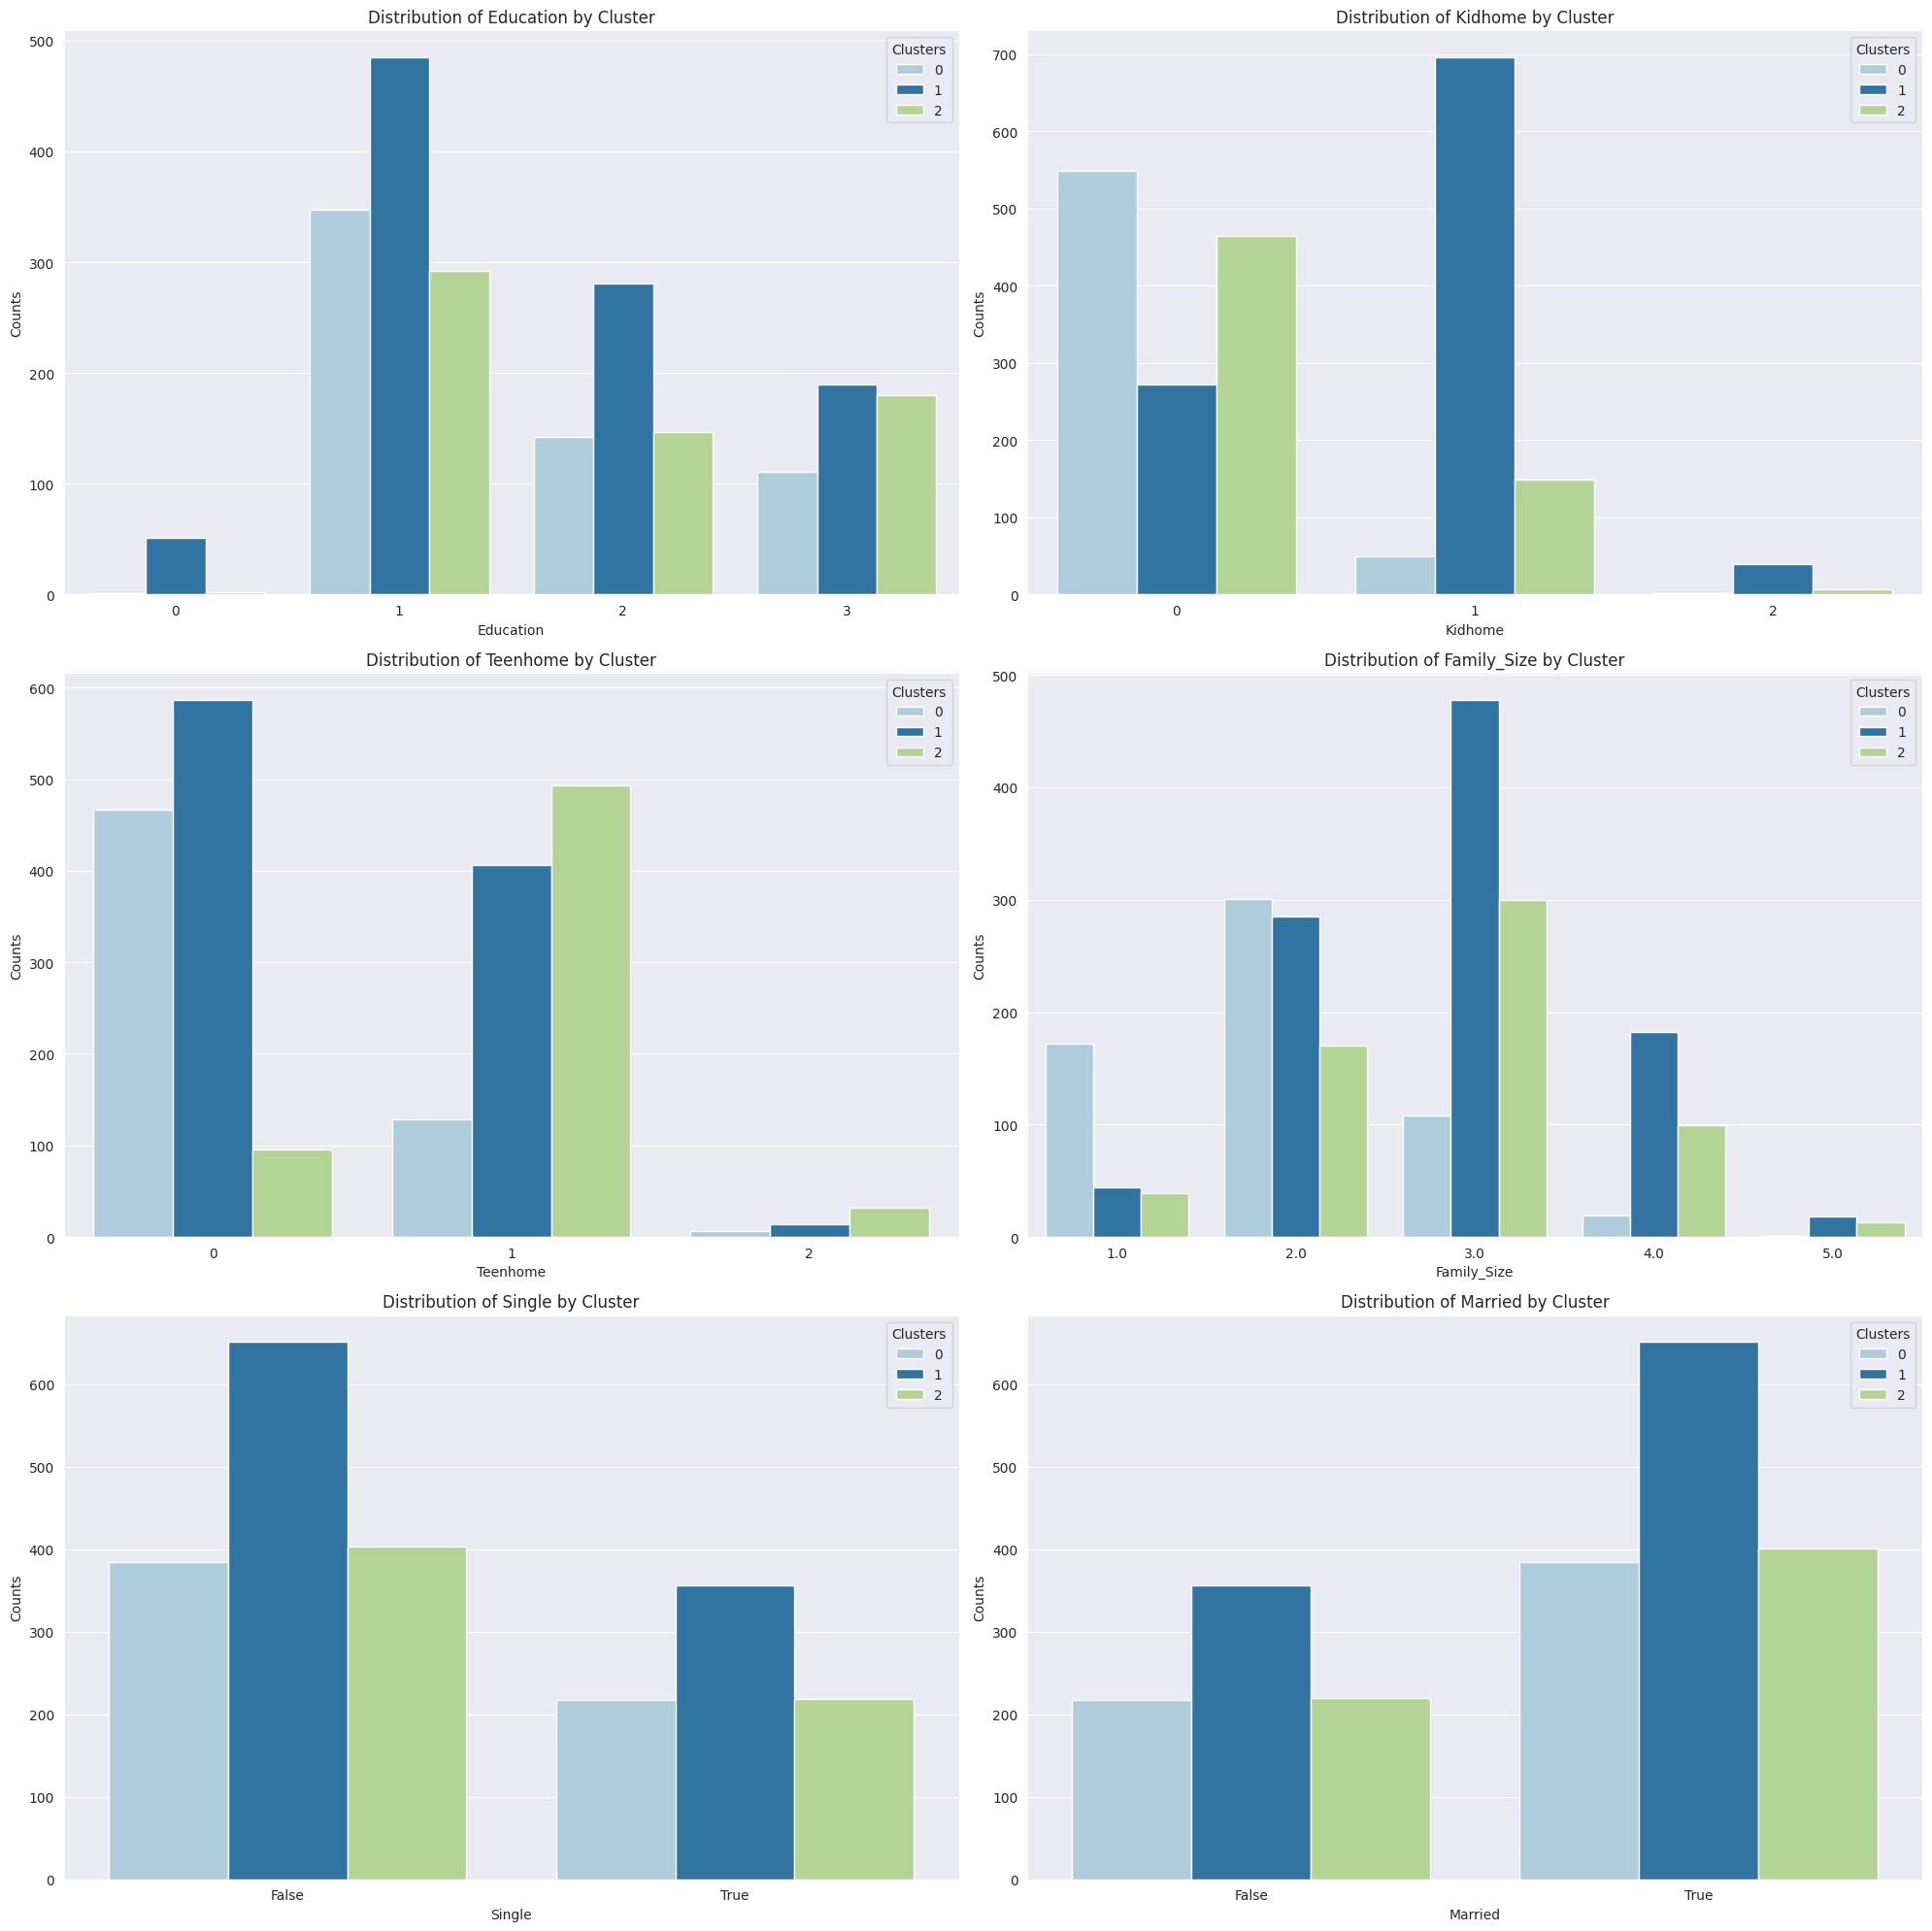

In [60]:
# Select categorical features
cat_features = ['Education', 'Kidhome', 'Teenhome', 'Family_Size', 'Single' ,'Married']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
axes = axes.flatten()

# Plot a barplot for each feature
for i, feature in enumerate(cat_features):
    # Group data by Clusters and count values
    grouped_data = data.groupby(["Clusters", feature]).size().reset_index(name="Counts")

    # Plot the grouped data
    sns.barplot(data=grouped_data, x=feature, y="Counts", hue="Clusters", ax=axes[i], palette="Paired")
    axes[i].set_title(f"Distribution of {feature} by Cluster")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Counts')

# Adjust layout
plt.tight_layout()
plt.show()

# Business Results

As a result of clustering, we received three groups of buyers:

## 0 cluster:
* Income people ranges Between (68000 to 82000)
* Average age is 55 years
* Have an education (Graduation, 2n Cycle or Master, PhD)
* People without family, people with families with 1 or without children
* Average Amount Spent is 1350$
* Most Things Buys are Wines and Meats
* Most often make purchases on the web and Catalog
* Most often make purchases (average number of purchases is 19)


## 1 cluster:
* Income people ranges Between (23000 to 42000)
* Average age is 51 years
* Have an education (Basic, Graduation, 2n Cycle or Master, PhD)
* People With family or With family with 1 or 2 Children
* Average Amount Spent is 50$
* Most Things Buys are Wines and Meats
* Most often make purchases in the stores themselves
* A low number of purchases(Avg is 5) and, accordingly, spend little money on purchases


## 2 cluster:
* Income people ranges Between (50000 to 68000)
* Average age is 59 years
* Have an education (Graduation, 2n Cycle or Master, PhD)
* People With family or With family with 1 or 2 Children
* Average Amount Spent is 650$
* Most Thing Buys is Wines
* Sometimes make purchases on the web and Sometimes make purchases in the stores themselves
* Average number of purchases is 16